In [1]:
import pandas as pd
import heartpy as hp
import neurokit2 as nk
import matplotlib.pyplot as plt
import openpyxl
import seaborn as sns
import datetime as datetime
import matlab as ml
import os

In [2]:
os.chdir('/home/jazzy/Documents/PPS-Project')
ppg_db_1 = pd.read_excel('full_raw_ppg_data.xlsx', sheet_name = 'ppg_db_1')

In [3]:
ppg_db_1['time2'] = ppg_db_1['time'] * 1000
print(ppg_db_1['time'].dtype)
print(ppg_db_1['time2'].values[0:20], len(ppg_db_1['time2'].values))

float64
[  0.          13.29890188  26.59780376  39.89670563  53.19560751
  66.49450939  79.79341127  93.09231314 106.39121502 119.6901169
 132.98901878 146.28792065 159.58682253 172.88572441 186.18462629
 199.48352817 212.78243004 226.08133192 239.3802338  252.67913568] 4256


In [6]:
Red1 = ppg_db_1['Red'].values
Green1 = ppg_db_1['Green'].values
Blue1 = ppg_db_1['Blue'].values
timer = ppg_db_1['time2'].values

sample_rate = hp.get_samplerate_mstimer(timer)
print(sample_rate)
sample_rate2 = 70

71.19608969286732


/home/jazzy/.local/lib/python3.8/site-packages/scipy/interpolate/_fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


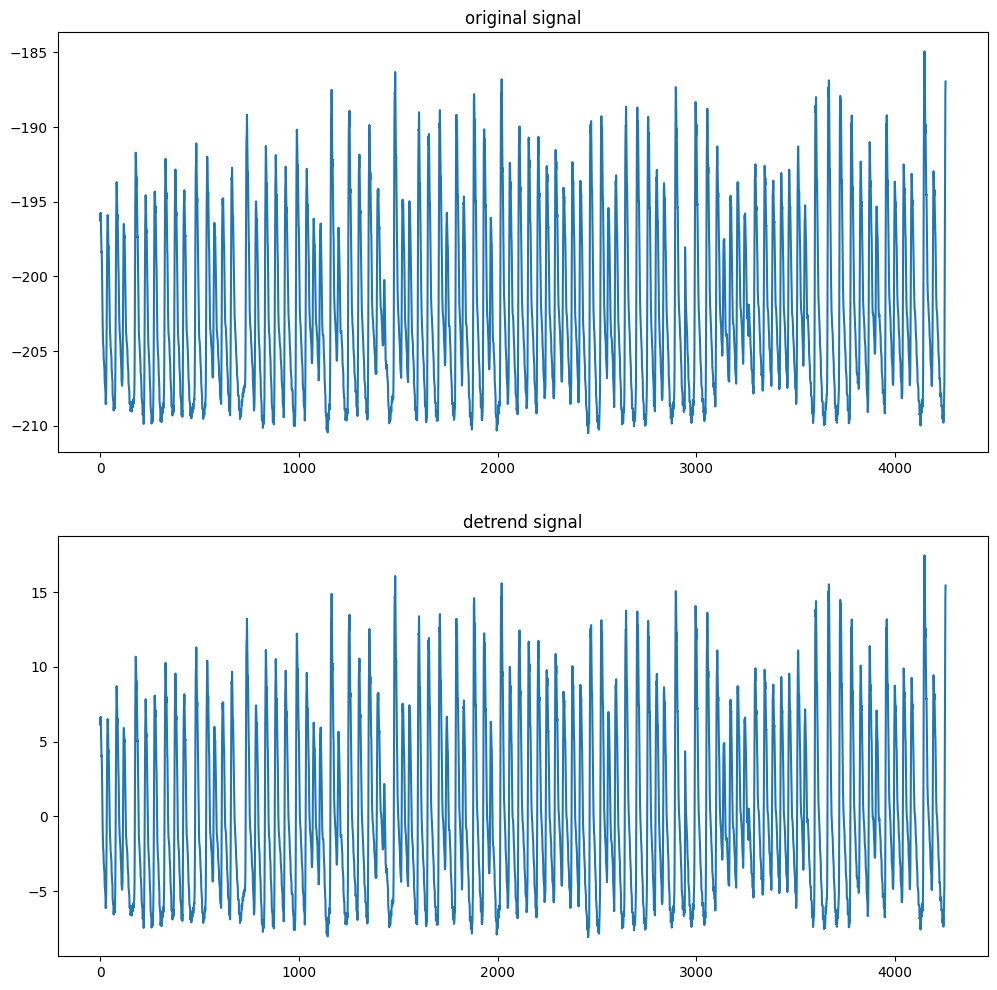

In [107]:
detrend = ml.detrend(Red1)
wd, m  = hp.process(detrend, sample_rate = sample_rate, freq_method='welch', interp_clipping=True, clean_rr=True, bpmmin=40, bpmmax=100, high_precision=True)

plt.figure(figsize=(12,12))
plt.subplot(211)
plt.plot(Red1[0:4256])
plt.title('original signal')
plt.subplot(212)
plt.plot(detrend[0:4256])
plt.title('detrend signal')
plt.show()

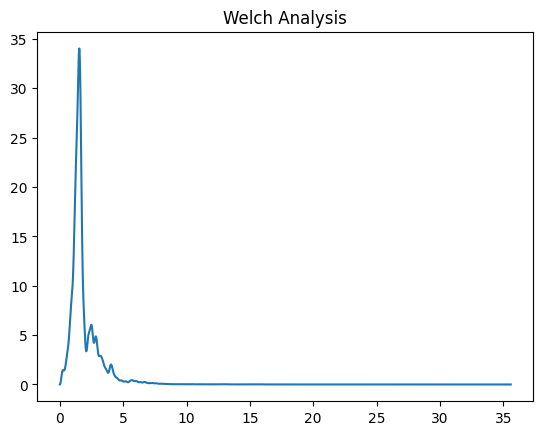

In [108]:
from scipy.signal import welch
f, Pxx= welch(detrend, fs=sample_rate, window=('gaussian',len(detrend)), nfft=len(detrend))
plt.plot(f, Pxx)
plt.title('Welch Analysis')
plt.show()

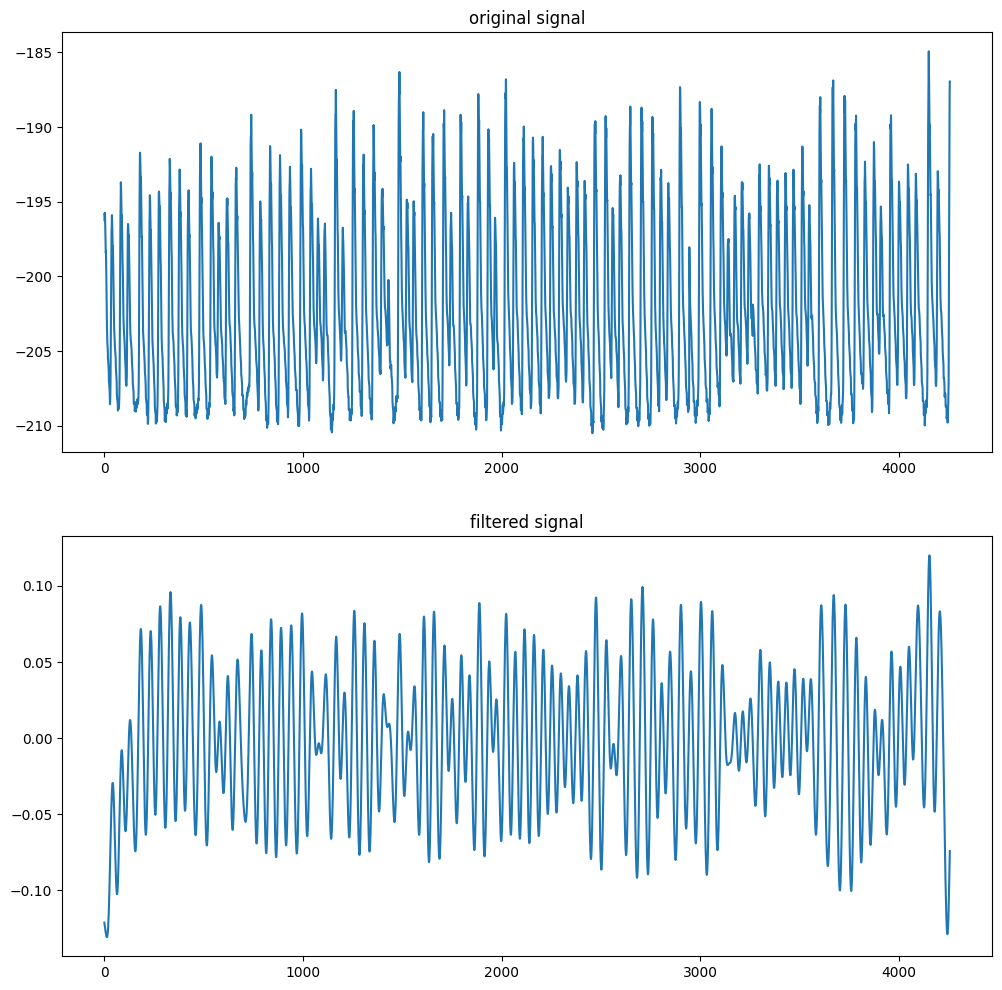

In [114]:
cleaned = nk.ppg_clean(detrend,sampling_rate = sample_rate)
cleaned = hp.remove_baseline_wander(cleaned, sample_rate=sample_rate, cutoff=0.05)
filtered = nk.signal_filter(cleaned, sampling_rate=sample_rate, lowcut = 3.8, highcut=7.5, method='fir', order = 4)

wd, m  = hp.process(filtered, sample_rate = sample_rate, freq_method='welch', interp_clipping=True, clean_rr=True, bpmmin=40, bpmmax=140, high_precision=True)
,
plt.figure(figsize=(12,12))
plt.subplot(211)
plt.plot(Red1[0:4256])
plt.title('original signal')
plt.subplot(212)
plt.plot(filtered[0:4256])
plt.title('filtered signal')
plt.show()

/home/jazzy/.local/lib/python3.8/site-packages/heartpy/visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 1500x800 with 0 Axes>

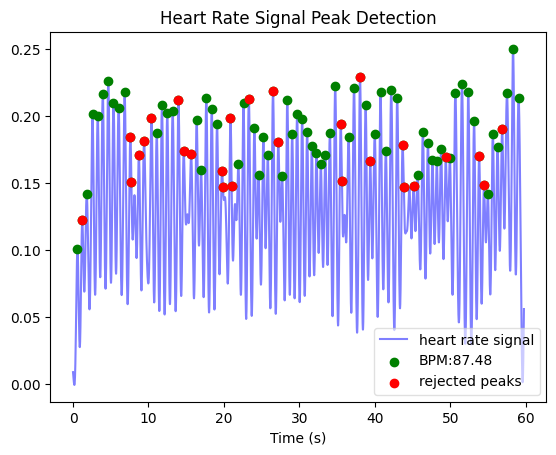

bpm: 87.476424
ibi: 685.899093
sdnn: 70.935111
sdsd: 40.332845
rmssd: 62.882587
pnn20: 0.630435
pnn50: 0.434783
hr_mad: 42.137146
sd1: 44.431143
sd2: 92.539172
s: 12917.038708
sd1/sd2: 0.480133
breathingrate: 0.166667


In [115]:
wd, m  = hp.process(filtered, sample_rate = sample_rate, freq_method='welch', interp_clipping=True, clean_rr=True)

plt.figure(figsize=(15,8))
hp.plotter(wd,m)

plt.show()
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))